<a href="https://colab.research.google.com/github/sthamamta/Transfer-Learning-VGG/blob/main/VGG_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.keras as K
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
def preprocess_data(X, Y):
        """ This method has the preprocess to train a model """
        X = X.astype('float32')
        X_p = K.applications.vgg16.preprocess_input(X)
        # Y_p = K.utils.to_categorical(Y, 10)
        return(X_p, Y)

In [ ]:
(Xt, Yt), (X, Y) = K.datasets.cifar10.load_data()
X_p, Y_p = preprocess_data(Xt, Yt)
Xv_p, Yv_p = preprocess_data(X, Y)


170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# X_p=X_p/255.0
# Xv_p=Xv_p/255.0
X_p.shape

(50000, 32, 32, 3)

In [ ]:
# weights are initialized as per the he et al. method
initializer = K.initializers.he_normal()
# input_tensor = K.Input(shape=(32, 32, 3))


IMAGE_SIZE = [32, 32]
base_model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top = False)

for layer in base_model.layers:
    layer.trainable = False


x = Flatten()(base_model.layers[-1].output)
dense1 = Dense(256, activation=('relu'), kernel_initializer = initializer,kernel_regularizer=K.regularizers.l2())(x)
dense2 = Dense(128, activation=('relu'), kernel_initializer = initializer,kernel_regularizer=K.regularizers.l2())(dense1)
prediction = Dense(10, activation='softmax')(dense1)
model = Model(inputs = base_model.input, outputs=prediction)
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
               optimizer="Adam", metrics=["sparse_categorical_accuracy","sparse_categorical_crossentropy"])


In [ ]:
model_history = model.fit(x = X_p, y = Y_p,
              batch_size = 16,
              validation_data=(Xv_p, Yv_p),
              epochs= 65, shuffle=True,
              verbose=1
              )

Epoch 1/65
3125/3125 [==============================] - 70s 9ms/step - loss: 7.0386 - sparse_categorical_accuracy: 0.5125 - sparse_categorical_crossentropy: 3.6476 - val_loss: 1.7823 - val_sparse_categorical_accuracy: 0.6165 - val_sparse_categorical_crossentropy: 1.1351
Epoch 2/65
3125/3125 [==============================] - 27s 9ms/step - loss: 1.5679 - sparse_categorical_accuracy: 0.6269 - sparse_categorical_crossentropy: 1.0723 - val_loss: 1.3920 - val_sparse_categorical_accuracy: 0.6175 - val_sparse_categorical_crossentropy: 1.1084
Epoch 3/65
3125/3125 [==============================] - 28s 9ms/step - loss: 1.3127 - sparse_categorical_accuracy: 0.6363 - sparse_categorical_crossentropy: 1.0521 - val_loss: 1.2580 - val_sparse_categorical_accuracy: 0.6329 - val_sparse_categorical_crossentropy: 1.0621
Epoch 4/65
3125/3125 [==============================] - 28s 9ms/step - loss: 1.2113 - sparse_categorical_accuracy: 0.6448 - sparse_categorical_crossentropy: 1.0215 - val_loss: 1.2326 - va

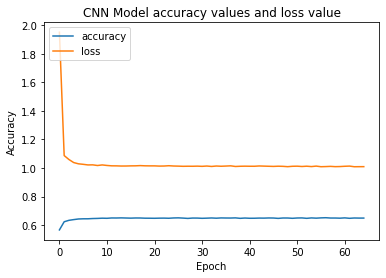

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['sparse_categorical_accuracy'])
plt.plot(model_history.history['sparse_categorical_crossentropy'])
plt.title('CNN Model accuracy values and loss value')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy, *other_values = model.evaluate(Xv_p, Yv_p)

313/313 [==============================] - 4s 9ms/step - loss: 1.1221 - sparse_categorical_accuracy: 0.6465 - sparse_categorical_crossentropy: 1.0318


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.6464999914169312


In [ ]:
print("Test loss: {}".format(test_loss))

Test loss: 1.1220791339874268


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
 !ls /content/drive/My\ Drive/ML_models

example  vggmodel_4.h5	vggmodel.h5


In [ ]:
model.save('/content/drive/My Drive/ML_models/vggmodel_v2.h5')

In [ ]:
 !ls /content/drive/My\ Drive/ML_models

example  vggmodel_4.h5	vggmodel.h5  vggmodel_v2.h5
